# Using Parseval's theorem to calculate $\pi$

We convinced ourselves that

$\frac{\pi^2}{6} = \sum \frac{1}{n^2}$

So,

$\pi = \sqrt{6} \sqrt{\sum \frac{1}{n^2}}$


In [1]:
from __future__ import division
%matplotlib inline
import numpy as np, scipy as sp, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def approxpi_slow(n):
    result = 0
    for m in range(1,n+1):
        result = result + 1/m**2
    return np.sqrt(6)*np.sqrt(result)

In [14]:
a=approxpi_slow(10000000)
print (a)
print (np.pi)
print ('%13.11f'%(np.pi - a))

3.1415925581
3.141592653589793
0.00000009549


In [3]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
def approxpi(n):
    return np.sqrt(6)*np.sqrt((1/np.arange(1,n+1)**2).sum())

In [5]:
a=approxpi(10000000)
print (a)
print (np.pi)
print ('%13.11f'%(np.pi - a))

3.1415925581
3.141592653589793
0.00000009549


While we're at it, we can also write quick Python code to look at the convergence of our square wave series

In [6]:
def a(n):
    if n == 0: return 1
    else: return 0
    
def b(n):
    if divmod(n,2)[1] == 0: #even
        return 0
    else:
        return 2/(n*np.pi)

x = np.linspace(-np.pi,np.pi,100)

def fourier(x,n):
    result = np.zeros_like(x) + 0.5*a(0)
    for i in range(1,n+1):
        result = result + a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return result

In [7]:
from ipywidgets import interact, static

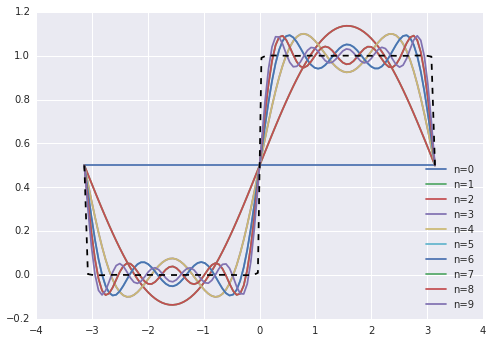

In [19]:
for i in range(10):
    plt.plot(x,fourier(x,i),label='n=%s'%i)
plt.plot(x,fourier(x,1000),'k--')
plt.legend(loc='lower right')

and it repeats nicely, as it should:

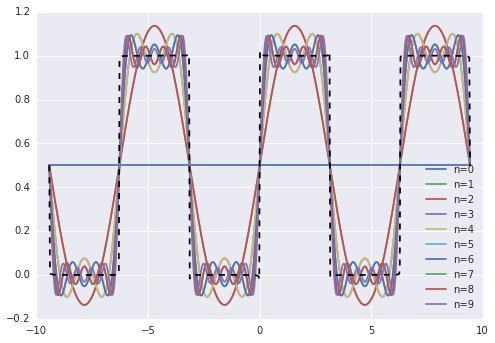

In [21]:
x = np.linspace(-3*np.pi,3*np.pi,600)
for i in range(10):
    plt.plot(x,fourier(x,i),label='n=%s'%i)
plt.plot(x,fourier(x,1000),'k--')
plt.legend(loc='lower right')

# Another awesome visualization

Check out [this great d3](http://bl.ocks.org/jinroh/7524988) visualization

# And now let's play with the awesome function we defined from Fourier Transforms!

In [8]:
from scipy import integrate
from numpy import pi, sin, cos, linspace

In [9]:
print integrate.quad(lambda x: sin(x), 0, 2*pi)
print integrate.quad(lambda x: sin(x), 0, pi)

SyntaxError: invalid syntax (<ipython-input-9-d1b6f1599246>, line 1)

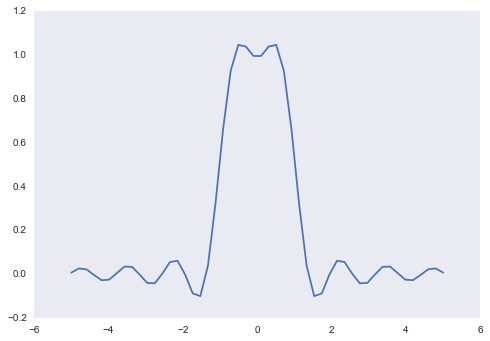

In [10]:
def f(x, toplim):
    def g(alpha): 
        return sin(alpha)*cos(alpha*x)/alpha
    return integrate.quad(g, 0, toplim)[0]*2/pi
# This says that the x values I care about go from -5 to 5, 
# and that there are 50 values to calculate inbetween.
xs = linspace(-5,5,50) 
# This says to calculate the integral going from 0 to 5
# (should be from 0 to infinity, but that would take a while)
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

So that's kind of convincing ... I mean, we can see that it looks a bit like 0 outside the range we want ... but not terribly. Does it help to add more points in the middle?

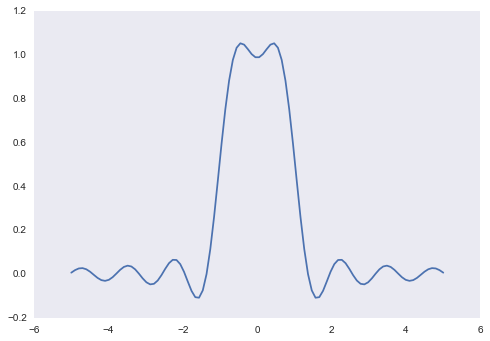

In [11]:
xs = linspace(-5,5,100) 
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

Nope. That just smooths out the ugliness. What does it look like farther away?

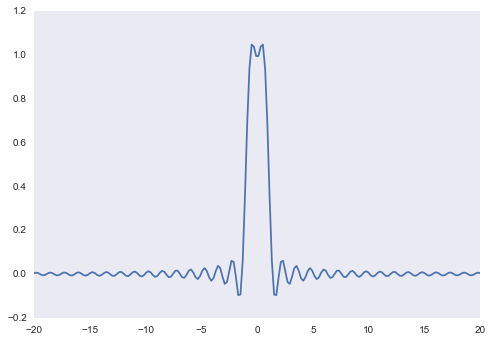

In [12]:
xs = linspace(-20,20,200) 
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

So, at least the ringing looks like it's dying off. What if we change the upper limit of the integral?

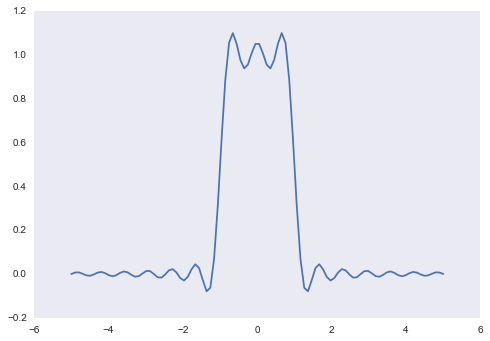

In [13]:
xs = linspace(-5,5,100) 
y = [f(x,10) for x in xs]
plt.plot(xs,y)
plt.grid()

That's looking better. Let's keep doing it.

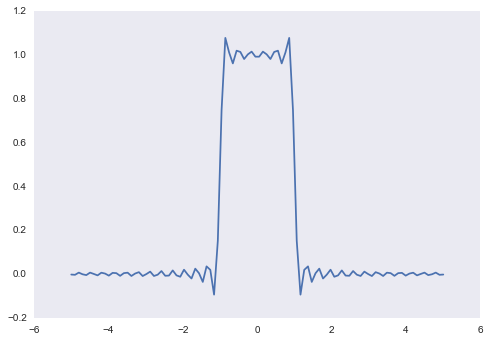

In [14]:
xs = linspace(-5,5,100) 
y = [f(x,20) for x in xs]
plt.plot(xs,y)
plt.grid()

/Users/mglerner/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/mglerner/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


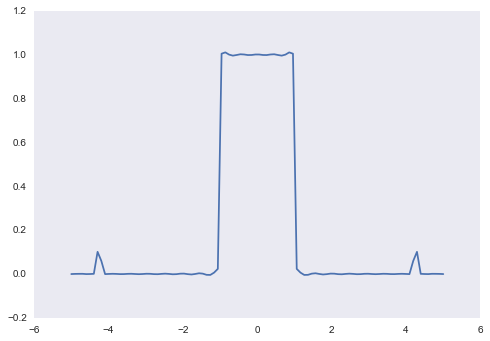

In [15]:
xs = linspace(-5,5,100) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()

Can we make sense of that? Well, remember that we evaluate `f` at a point by calculating

<pre><code>return integrate.quad(g, 0, toplim)[0]*2/pi</pre></code>

That is, `g(alpha)` gets integrated from `0` to `toplim`. So essentially we're looking at Parseval's theorem here. If we don't have the full spectrum (i.e. all of the $\alpha$'s), we can't reproduce our function!

How close are we to reproducing the function entirely? Well, not as close as we might like. Remember, the intiutive argument was that we had to make things continuous and integrate over all values of $\alpha$ to "stretch the period out to infinity," so the ringing gets kind of ugly:

/Users/mglerner/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/mglerner/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


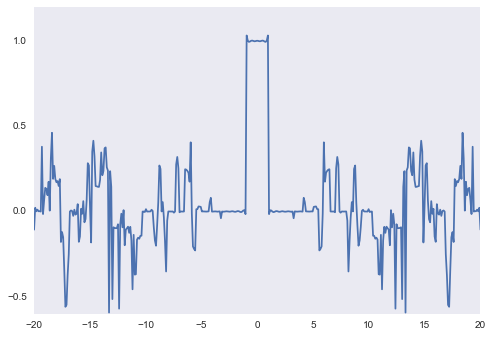

In [16]:
xs = linspace(-20,20,400) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()

/Users/mglerner/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/mglerner/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


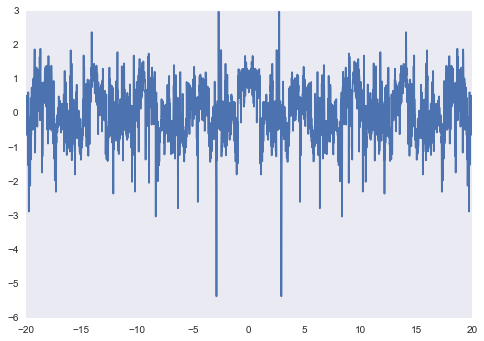

In [17]:
xs = linspace(-20,20,4000) 
y = [f(x,20000) for x in xs]
plt.plot(xs,y)
plt.grid()

So part of the story there is that numerical methods is fully deserving of its own course. Errors accumulate in ways you aren't expecting, and you don't always get better answers by doing the "obvious" thing. Let's be happy with

/Users/mglerner/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


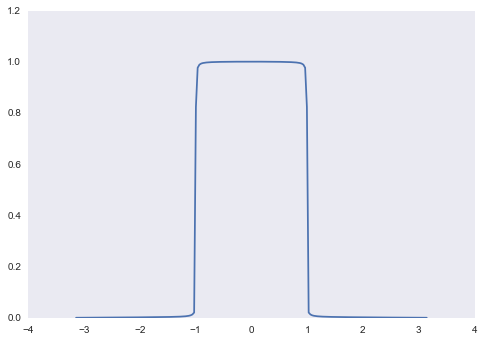

In [18]:
xs = linspace(-pi,pi,200) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()

And now let's approximate a delta distribution. You'll recall

$\delta(x-a) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{i\alpha(x-a)}d\alpha$

but you'll also recall that the integral doesn't converge. Let's look at taking a limit.